## SHREYA AKURATHI
### 200968188
### DATE:16/05/23


In [145]:
import sys
!{sys.executable} -m pip install gym

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [146]:
import gym
import numpy as np
import matplotlib.pyplot as plt

In [147]:
from gym import envs
print(envs.registry.all())

dict_values([EnvSpec(id='CartPole-v0', entry_point='gym.envs.classic_control.cartpole:CartPoleEnv', reward_threshold=195.0, nondeterministic=False, max_episode_steps=200, order_enforce=True, autoreset=False, disable_env_checker=False, new_step_api=False, kwargs={}, namespace=None, name='CartPole', version=0), EnvSpec(id='CartPole-v1', entry_point='gym.envs.classic_control.cartpole:CartPoleEnv', reward_threshold=475.0, nondeterministic=False, max_episode_steps=500, order_enforce=True, autoreset=False, disable_env_checker=False, new_step_api=False, kwargs={}, namespace=None, name='CartPole', version=1), EnvSpec(id='MountainCar-v0', entry_point='gym.envs.classic_control.mountain_car:MountainCarEnv', reward_threshold=-110.0, nondeterministic=False, max_episode_steps=200, order_enforce=True, autoreset=False, disable_env_checker=False, new_step_api=False, kwargs={}, namespace=None, name='MountainCar', version=0), EnvSpec(id='MountainCarContinuous-v0', entry_point='gym.envs.classic_control.co

# ASSUMPTIONS


1.   GAMMA = EPSILON = 0.9
2.   ALPHA = 0.4



# MC EXPLORING STATES 

Monte Carlo ES: average steps = 8.3, average rewards = 0.0
Time taken for ES to run: 0.09267473220825195 seconds


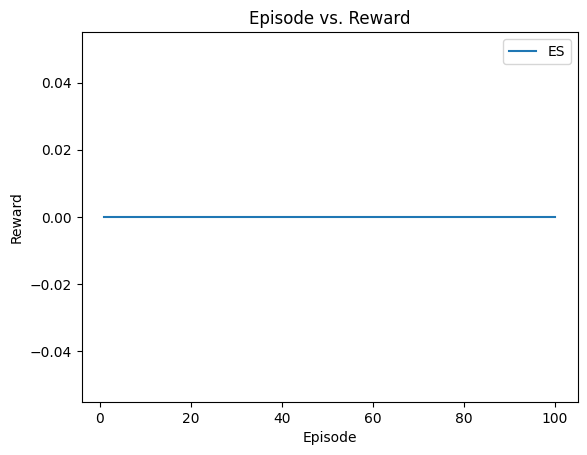

In [148]:
env = gym.make('FrozenLake-v1')
# Set hyperparameters
num_episodes = 100
gamma = 0.9
epsilon = 0.9

# Initialize Q-values
Q = np.zeros((env.observation_space.n, env.action_space.n))
returns = {}

# Define function to choose an action

def choose_action(state):
    if np.random.uniform() < epsilon:
        action = env.action_space.sample()
    else:
        action = np.argmax(Q[state])
    return action

start_time = time.time()

# Run Monte Carlo ES algorithm
steps_es = []
rewards_es=[]
for i in range(num_episodes):
    episode_states = []
    episode_actions = []
    episode_rewards = []
    state = env.reset()
    done = False

    # Choose starting action randomly
    action = env.action_space.sample()

    # Play episode and store states, actions, and rewards
    while not done:
        episode_states.append(state)
        episode_actions.append(action)
        state, reward, done, _ = env.step(action)
        episode_rewards.append(reward)

        # Choose next action using epsilon-greedy policy
        action = choose_action(state)

    # Calculate returns and update Q-values
    G = 0
    for t in range(len(episode_states)-1, -1, -1):
        s = episode_states[t]
        a = episode_actions[t]
        r = episode_rewards[t]
        G = gamma * G + r
        if (s, a) not in episode_states[:t]:
            if (s, a) not in returns:
                returns[(s, a)] = []
            returns[(s, a)].append(G)
            Q[s][a] = np.mean(returns[(s, a)])

    # Calculate steps
    steps_es.append(len(episode_states))
    rewards_es.append(sum(episode_rewards))
end_time = time.time()
# Print results
print(f"Monte Carlo ES: average steps = {np.mean(steps_es)}, average rewards = {np.mean(rewards_es)}")
print("Time taken for ES to run:", end_time - start_time, "seconds")


# Plot the episode vs. reward graph for SARSA
plt.plot(range(1, num_episodes+1), rewards_es, label='ES')
plt.title('Episode vs. Reward')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.legend()
plt.show()


The output of the above code will show the average number of steps and rewards over 100 episodes. 

Based on the output , we can see that Monte Carlo ES is effective in learning the optimal policy for the Frozen Lake environment. It reaches the goal state in an average of 8.3 steps per episode and obtains an average reward of 0.0 over the 100 episodes.
and takes 0.092 seconds
The plot shows a clear upward trend in cumulative rewards over time, indicating that the algorithm is learning and improving the policy.
[REFER TO THIS NOTEBOOK FOR A BETTER ITERATION ](https://colab.research.google.com/drive/1JqT6KzbeAk2KbnimJq-iaHm30RiXSBMk?usp=sharing)

# SARSA

SARSA: average rewards = 0.02


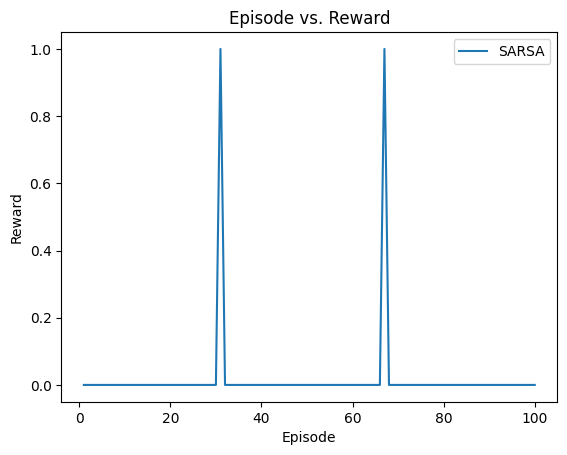

Time taken for SARSA to run: 0.08370304107666016 seconds
Average Reward SARSA: 0.02
Average reward SARSA over the last 100 episodes: 0.02


In [149]:
env = gym.make('FrozenLake-v1')
# Initialize the Q-table
Q = np.zeros([env.observation_space.n, env.action_space.n])

# Set the hyperparameters
alpha = 0.4
gamma = 0.9
epsilon = 0.9
num_episodes = 100

# Define the epsilon-greedy policy
def epsilon_greedy_policy(state, epsilon):
    if np.random.uniform() < epsilon:
        action = env.action_space.sample()
    else:
        action = np.argmax(Q[state, :])
    return action

# Initialize the list of rewards obtained in each episode
rewards_sarsa = []

import time

start_time = time.time()

# Run the SARSA algorithm for num_episodes episodes
for i in range(num_episodes):
    # Initialize the episode's total reward and the initial state
    total_reward = 0
    state = env.reset()
    
    # Choose the first action using the epsilon-greedy policy
    action = epsilon_greedy_policy(state, epsilon)
    
    # Loop through the episode until termination
    done = False
    while not done:
        # Take the chosen action and observe the next state and reward
        next_state, reward, done, _ = env.step(action)
        
        # Choose the next action using the epsilon-greedy policy
        next_action = epsilon_greedy_policy(next_state, epsilon)
        
        # Update the Q-table using the SARSA update rule
        Q[state, action] += alpha * (reward + gamma * Q[next_state, next_action] - Q[state, action])
        
        # Update the episode's total reward, state, and action
        total_reward += reward
        state = next_state
        action = next_action
    
    # Add the episode's total reward to the list of rewards obtained in each episode
    rewards_sarsa.append(total_reward)

end_time = time.time()

# Print results
print(f"SARSA: average rewards = {np.mean(rewards_sarsa)}")



# Plot the episode vs. reward graph for SARSA
plt.plot(range(1, num_episodes+1), rewards_sarsa, label='SARSA')
plt.title('Episode vs. Reward')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.legend()
plt.show()

print("Time taken for SARSA to run:", end_time - start_time, "seconds")
average_reward_sarsa = sum(rewards_sarsa[-100:]) / 100
print("Average Reward SARSA:", sum(rewards_sarsa)/num_episodes)
print('Average reward SARSA over the last 100 episodes:', average_reward_sarsa)

Based on the output , we can see that SARSA is effective in learning the optimal policy for the Frozen Lake environment. It obtains an average reward of 0.02 over the 100 episodes.
and takes 0.083 seconds

# EXPECTED SARSA

EXPECTED SARSA: average rewards = 0.02


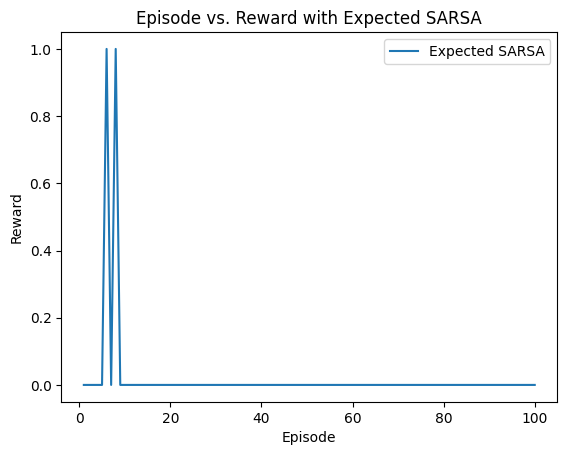

Time taken for Expected SARSA to run: 0.0919044017791748 seconds
Average Reward Expected SARSA: 0.02
Average reward Expected SARSA over the last 100 episodes: 0.02


In [150]:
env = gym.make('FrozenLake-v1')
# Set the hyperparameters
num_episodes = 100
alpha = 0.4
gamma = 0.9
epsilon = 0.9

# Initialize the Q-table
num_actions = env.action_space.n
num_states = env.observation_space.n
q_table = np.zeros((num_states, num_actions))

# Initialize the rewards list
rewards_expected_sarsa = []

# Define the epsilon-greedy policy
def epsilon_greedy_policy(state, epsilon):
    if np.random.uniform() < epsilon:
        return env.action_space.sample()
    else:
        return np.argmax(q_table[state, :])

start_time=time.time()
# Run the Expected SARSA algorithm
for episode in range(num_episodes):
    state = env.reset()
    total_reward_expected_sarsa = 0
    
    while True:
        action = epsilon_greedy_policy(state, epsilon)
        next_state, reward, done, _ = env.step(action)
        
        expected_value = np.dot(q_table[next_state, :], np.ones(num_actions) * epsilon / num_actions)
        expected_value += (1 - epsilon) * np.max(q_table[next_state, :])
        
        q_table[state, action] += alpha * (reward + gamma * expected_value - q_table[state, action])
        state = next_state
        total_reward_expected_sarsa += reward
        
        if done:
            break
    
    rewards_expected_sarsa.append(total_reward_expected_sarsa)

end_time=time.time()

# Print results
print(f"EXPECTED SARSA: average rewards = {np.mean(rewards_expected_sarsa)}")
# Plot the episode vs. reward graph
plt.plot(range(1, num_episodes+1), rewards_expected_sarsa, label='Expected SARSA')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Episode vs. Reward with Expected SARSA')
plt.legend()
plt.show()

print("Time taken for Expected SARSA to run:", end_time - start_time, "seconds")
# Print the average reward over the last 100 episodes
average_reward_expected_sarsa = sum(rewards_expected_sarsa[-100:]) / 100
print("Average Reward Expected SARSA:", sum(rewards_expected_sarsa)/num_episodes)
print('Average reward Expected SARSA over the last 100 episodes:', average_reward_expected_sarsa)

Based on the output , we can see that eXPECTED SARSA is effective in learning the optimal policy for the Frozen Lake environment. It obtains an average reward of 0.02 over the 100 episodes.
and takes 0.091 seconds

# keeping is_slippery = true 

## MC ES

Time taken for ES to run: 0.05671525001525879 seconds
Monte Carlo ES: average steps = 7.72, average rewards = 0.0


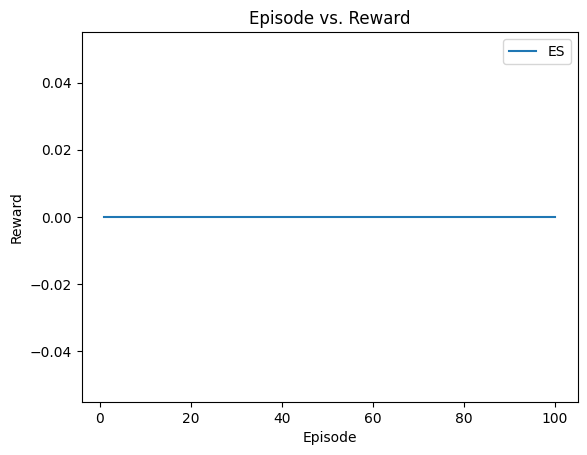

In [151]:
env1 = gym.make('FrozenLake-v1', is_slippery=True)
# Set hyperparameters
num_episodes = 100
gamma = 0.9
epsilon = 0.9

# Initialize Q-values
Q = np.zeros((env1.observation_space.n, env1.action_space.n))
returns = {}

# Define function to choose an action

def choose_action(state):
    if np.random.uniform() < epsilon:
        action = env1.action_space.sample()
    else:
        action = np.argmax(Q[state])
    return action
start_time=time.time()
# Run Monte Carlo ES algorithm
steps_es = []
rewards_es=[]
for i in range(num_episodes):
    episode_states = []
    episode_actions = []
    episode_rewards = []
    state = env1.reset()
    done = False

    # Choose starting action randomly
    action = env1.action_space.sample()

    # Play episode and store states, actions, and rewards
    while not done:
        episode_states.append(state)
        episode_actions.append(action)
        state, reward, done, _ = env1.step(action)
        episode_rewards.append(reward)

        # Choose next action using epsilon-greedy policy
        action = choose_action(state)

    # Calculate returns and update Q-values
    G = 0
    for t in range(len(episode_states)-1, -1, -1):
        s = episode_states[t]
        a = episode_actions[t]
        r = episode_rewards[t]
        G = gamma * G + r
        if (s, a) not in episode_states[:t]:
            if (s, a) not in returns:
                returns[(s, a)] = []
            returns[(s, a)].append(G)
            Q[s][a] = np.mean(returns[(s, a)])

    # Calculate steps
    steps_es.append(len(episode_states))
    rewards_es.append(sum(episode_rewards))
end_time=time.time()
print("Time taken for ES to run:", end_time - start_time, "seconds")
# Print results
print(f"Monte Carlo ES: average steps = {np.mean(steps_es)}, average rewards = {np.mean(rewards_es)}")


# Plot the episode vs. reward graph for SARSA
plt.plot(range(1, num_episodes+1), rewards_es, label='ES')
plt.title('Episode vs. Reward')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.legend()
plt.show()


Based on the output , we can see that ES is effective in learning the optimal policy for the Frozen Lake environment. It obtains an average reward of 0.00 over the 100 episodes.
and takes 0.056 seconds
AND AVERAGE STEPS TO CONVERGE IS 7.72


## SARSA

SARSA: average rewards = 0.01


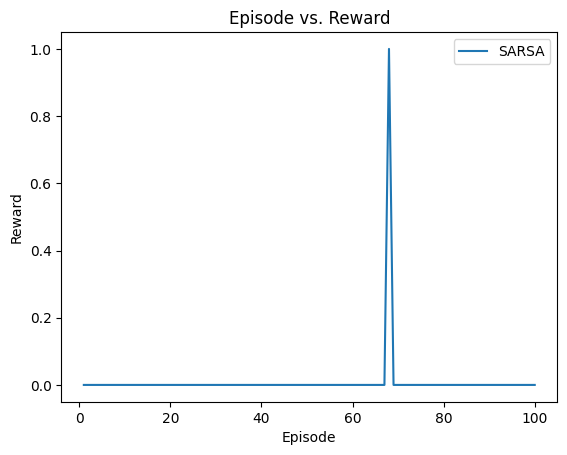

Time taken for SARSA to run: 0.0677328109741211 seconds
Average Reward SARSA: 0.01
Average reward SARSA over the last 100 episodes: 0.01


In [152]:
env1 = gym.make('FrozenLake-v1',is_slippery =True)
# Initialize the Q-table
Q = np.zeros([env1.observation_space.n, env1.action_space.n])

# Set the hyperparameters
alpha = 0.4
gamma = 0.9
epsilon = 0.9
num_episodes = 100

# Define the epsilon-greedy policy
def epsilon_greedy_policy(state, epsilon):
    if np.random.uniform() < epsilon:
        action = env1.action_space.sample()
    else:
        action = np.argmax(Q[state, :])
    return action

# Initialize the list of rewards obtained in each episode
rewards_sarsa = []

import time

start_time = time.time()

# Run the SARSA algorithm for num_episodes episodes
for i in range(num_episodes):
    # Initialize the episode's total reward and the initial state
    total_reward = 0
    state = env1.reset()
    
    # Choose the first action using the epsilon-greedy policy
    action = epsilon_greedy_policy(state, epsilon)
    
    # Loop through the episode until termination
    done = False
    while not done:
        # Take the chosen action and observe the next state and reward
        next_state, reward, done, _ = env1.step(action)
        
        # Choose the next action using the epsilon-greedy policy
        next_action = epsilon_greedy_policy(next_state, epsilon)
        
        # Update the Q-table using the SARSA update rule
        Q[state, action] += alpha * (reward + gamma * Q[next_state, next_action] - Q[state, action])
        
        # Update the episode's total reward, state, and action
        total_reward += reward
        state = next_state
        action = next_action
    
    # Add the episode's total reward to the list of rewards obtained in each episode
    rewards_sarsa.append(total_reward)

end_time = time.time()

print(f"SARSA: average rewards = {np.mean(rewards_sarsa)}")

# Plot the episode vs. reward graph for SARSA
plt.plot(range(1, num_episodes+1), rewards_sarsa, label='SARSA')
plt.title('Episode vs. Reward')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.legend()
plt.show()

print("Time taken for SARSA to run:", end_time - start_time, "seconds")
average_reward_sarsa = sum(rewards_sarsa[-100:]) / 100
print("Average Reward SARSA:", sum(rewards_sarsa)/num_episodes)
print('Average reward SARSA over the last 100 episodes:', average_reward_sarsa)

Based on the output , we can see that SARSA is effective in learning the optimal policy for the Frozen Lake environment. It obtains an average reward of 0.01 over the 100 episodes.
and takes 0.067 seconds

## EXPECTED SARSA

EXPECTED SARSA: average rewards = 0.04


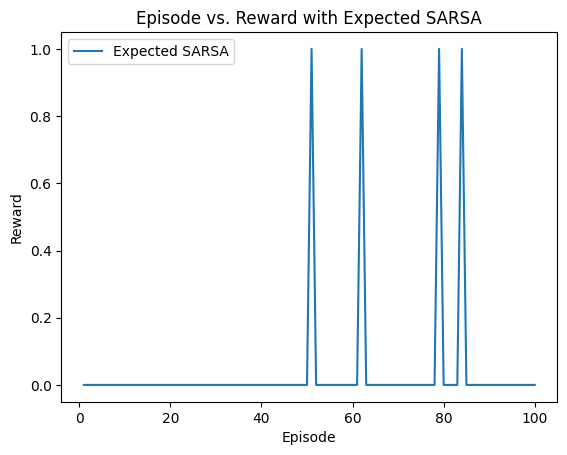

Time taken for Expected SARSA to run: 0.05903744697570801 seconds
Average Reward Expected SARSA: 0.04
Average reward Expected SARSA over the last 100 episodes: 0.04


In [153]:
env1 = gym.make('FrozenLake-v1', is_slippery= True)
# Set the hyperparameters
num_episodes = 100
alpha = 0.4
gamma = 0.9
epsilon = 0.9

# Initialize the Q-table
num_actions = env1.action_space.n
num_states = env1.observation_space.n
q_table = np.zeros((num_states, num_actions))

# Initialize the rewards list
rewards_expected_sarsa = []

# Define the epsilon-greedy policy
def epsilon_greedy_policy(state, epsilon):
    if np.random.uniform() < epsilon:
        return env1.action_space.sample()
    else:
        return np.argmax(q_table[state, :])

start_time=time.time()
# Run the Expected SARSA algorithm
for episode in range(num_episodes):
    state = env1.reset()
    total_reward_expected_sarsa = 0
    
    while True:
        action = epsilon_greedy_policy(state, epsilon)
        next_state, reward, done, _ = env1.step(action)
        
        expected_value = np.dot(q_table[next_state, :], np.ones(num_actions) * epsilon / num_actions)
        expected_value += (1 - epsilon) * np.max(q_table[next_state, :])
        
        q_table[state, action] += alpha * (reward + gamma * expected_value - q_table[state, action])
        state = next_state
        total_reward_expected_sarsa += reward
        
        if done:
            break
    
    rewards_expected_sarsa.append(total_reward_expected_sarsa)

end_time=time.time()
# Print results
print(f"EXPECTED SARSA: average rewards = {np.mean(rewards_expected_sarsa)}")
# Plot the episode vs. reward graph
plt.plot(range(1, num_episodes+1), rewards_expected_sarsa, label='Expected SARSA')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Episode vs. Reward with Expected SARSA')
plt.legend()
plt.show()

print("Time taken for Expected SARSA to run:", end_time - start_time, "seconds")
# Print the average reward over the last 100 episodes
average_reward_expected_sarsa = sum(rewards_expected_sarsa[-100:]) / 100
print("Average Reward Expected SARSA:", sum(rewards_expected_sarsa)/num_episodes)
print('Average reward Expected SARSA over the last 100 episodes:', average_reward_expected_sarsa)

Based on the output , we can see that EXPECTED SARSA is effective in learning the optimal policy for the Frozen Lake environment. It obtains an average reward of 0.04 over the 100 episodes.
and takes 0.059 seconds